#Import the libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

# Read the data

In [4]:
df=pd.read_csv('/content/AMZN (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
2,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
3,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
4,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
...,...,...,...,...,...,...,...
5896,2020-10-20,3222.280029,3266.000000,3192.010010,3217.010010,3217.010010,4509700
5897,2020-10-21,3212.500000,3233.879883,3160.000000,3184.939941,3184.939941,4592700
5898,2020-10-22,3189.870117,3198.750000,3121.939941,3176.399902,3176.399902,4212000
5899,2020-10-23,3191.000000,3205.330078,3140.000000,3204.399902,3204.399902,3466700


In [5]:
df.iloc[:,1].describe()

count    5901.000000
mean      401.743911
std       649.114450
min         1.406250
25%        38.125000
50%        84.629997
75%       373.489990
max      3547.000000
Name: Open, dtype: float64

#Split into Train and Visualize it


In [25]:
X=df['Open']
x=np.array(X[:5700])
x=x.reshape(x.shape[0],1)

In [26]:
x.shape

(5700, 1)

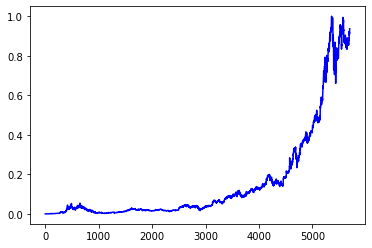

In [67]:
plt.plot(x,c='b')

# Scale the data using MinmaxScaler

In [27]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

#Create Sequences

In [28]:
def create_dataset(data,time_step):
    X_train=[]
    Y_train=[]
    for i in range(len(data)-time_step-1):
      a=(data[i:(i+time_step),0])
      X_train.append(a)
      Y_train.append(data[i+time_step,0])
    return np.array(X_train),np.array(Y_train)


In [29]:
X_train,Y_train=create_dataset(x,30)
print(X_train.shape,Y_train.shape)

(5669, 30) (5669,)


In [30]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

(5669, 30, 1)


#The Model

In [31]:
model=Sequential()
model.add(LSTM(100,activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(1,activation='linear'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 100)           40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 100)           80400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
model.compile(optimizer='rmsprop',loss='mse')

In [36]:
history=model.fit(X_train,Y_train,epochs=20)

Epoch 1/20
178/178 [==============================] - 5s 29ms/step - loss: 0.0063
Epoch 2/20
178/178 [==============================] - 5s 29ms/step - loss: 0.0014
Epoch 3/20
178/178 [==============================] - 5s 29ms/step - loss: 9.1655e-04
Epoch 4/20
178/178 [==============================] - 5s 29ms/step - loss: 7.5317e-04
Epoch 5/20
178/178 [==============================] - 5s 29ms/step - loss: 5.9312e-04
Epoch 6/20
178/178 [==============================] - 5s 29ms/step - loss: 5.2037e-04
Epoch 7/20
178/178 [==============================] - 5s 29ms/step - loss: 4.2096e-04
Epoch 8/20
178/178 [==============================] - 5s 29ms/step - loss: 3.7731e-04
Epoch 9/20
178/178 [==============================] - 5s 29ms/step - loss: 3.5366e-04
Epoch 10/20
178/178 [==============================] - 5s 29ms/step - loss: 3.2283e-04
Epoch 11/20
178/178 [==============================] - 5s 29ms/step - loss: 3.1517e-04
Epoch 12/20
178/178 [==============================] - 5s 29

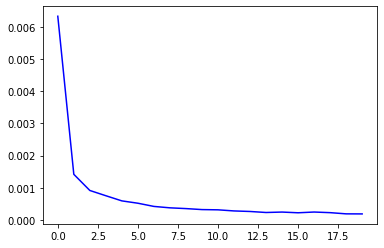

In [37]:
plt.plot(history.history['loss'],c='b')
plt.show()

# Split the data into Test Set

In [38]:
x_test=np.array(X[5700:])
x_test=x_test.reshape(x_test.shape[0],1)
x_test=scaler.fit_transform(x_test)

In [39]:
X_test,Y_test=create_dataset(x_test,30)
print(X_test.shape,Y_test.shape)

(170, 30) (170,)


#View the data distribution

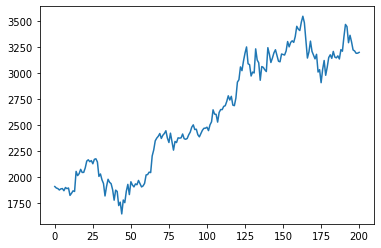

In [40]:
plt.plot(scaler.inverse_transform(x_test))

In [41]:
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test.shape

(170, 30, 1)

#The prediction

In [42]:
Y_pred=model.predict(X_test)

In [43]:
r=scaler.inverse_transform(Y_test.reshape(-1,1))
q=scaler.inverse_transform(Y_pred)


#Plotting predicted Data with the original Distribution

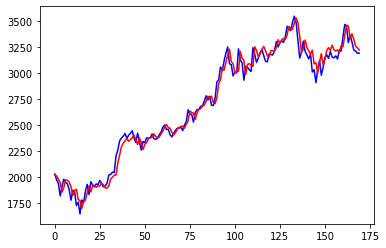

In [44]:
plt.plot(r,c='b')
plt.plot(q,c='r')
plt.show()

#Check for the Next 'n' Days

In [62]:
def update(X_check,Y_new,Y_final):
  e=float(Y_new[0])
  d=X_check
  d[0,0]=0
  d[0,29]=e
  Y_final.append(e)
  X_check=d
  return X_check,(Y_final)

In [63]:
def predict_next(days):
  X_check=np.array(X[5900-29:])
  X_check=X_check.reshape(-1,1)
  X_check=scaler.fit_transform(X_check)
  X_check=X_check.reshape((1,30,1))
  Y_final=[]
  for i in range(0,days):
    Y_new=model.predict(X_check)
    X_check,Y_final=update(X_check,Y_new,Y_final)
  return scaler.inverse_transform(np.array(Y_final).reshape(days,1))

In [65]:
days=int(input("Enter The no of days you want to predict for: "))
final_prediction=predict_next(days)

Enter The no of days you want to predict for: 10


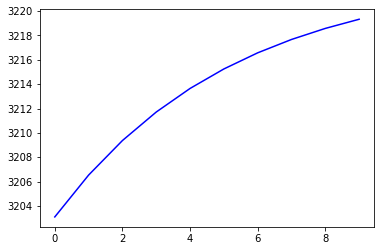

In [66]:
plt.plot(final_prediction,c='b')